In [44]:
!pip install pandas

In [ ]:
import pandas as py
df=py.read_csv("/uci_malware_detection.csv")

In [ ]:
df.head(10)


,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
0,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
#MISSING VALUES
classes,count=np.unique(df['Label'],return_counts=True)
#Perform Label Encoding
lbl_enc = LabelEncoder()
print(lbl_enc.fit_transform(classes),classes)
df = df.replace(classes,lbl_enc.fit_transform(classes))

#Dataset contains special characters like ''?' and 'S'. Set them to NaN and use dropna() to remove them
df=df.replace('[?,S]',np.NaN,regex=True)
print("Total missing values : ",sum(list(df.isna().sum())))
df.dropna(inplace=True)
for c in df.columns:
    df[c] = pd.to_numeric(df[c])
df

[0 1] ['malicious' 'non-malicious']
Total missing values :  0


,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
0,1,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
369,0,1,0,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
370,0,1,0,1,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
371,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df.isnull().sum()

Label    0
F_1      0
F_2      0
F_3      0
F_4      0
        ..
F_527    0
F_528    0
F_529    0
F_530    0
F_531    0
Length: 532, dtype: int64

In [ ]:
#RANDOM FOREST CLASSIFIER
#Random Tree-10
train_x,test_x,train_y,test_y = train_test_split(df[df.columns[:len(df.columns)-1]].to_numpy(),df[df.columns[-1]].to_numpy(),test_size = 0.45,shuffle=True)

In [ ]:
print("Train features size : ",len(train_x))
print("Train labels size : ",len(train_y))
print("Test features size : ",len(test_x))
print("Test features size : ",len(test_y))

Train features size :  205
Train labels size :  205
Test features size :  168
Test features size :  168


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create an instance of the RandomForestClassifier with 100 trees
clf = RandomForestClassifier(n_estimators=100)
# Build the Random Forest model
clf.fit(train_x,train_y)

RandomForestClassifier()

In [ ]:
# Make predictions on the testing set
y_pred=clf.predict(test_x)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.8630952380952381


In [ ]:
len(clf.estimators_)

100

In [ ]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[143   0]
 [ 23   2]]


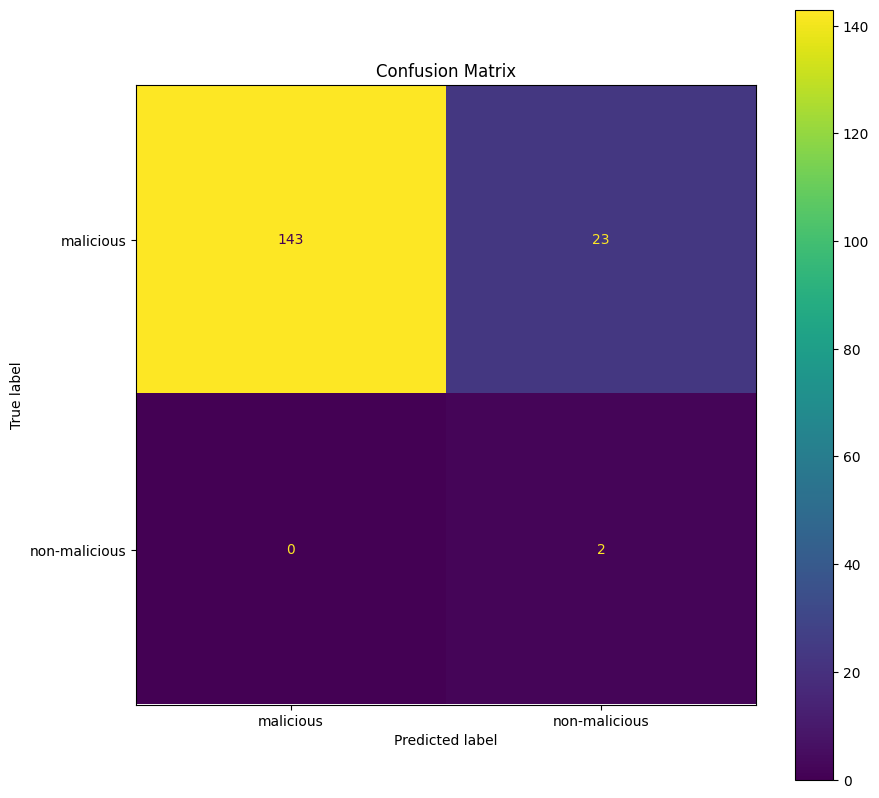

In [ ]:
cm = confusion_matrix(y_pred,test_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

<Axes: >

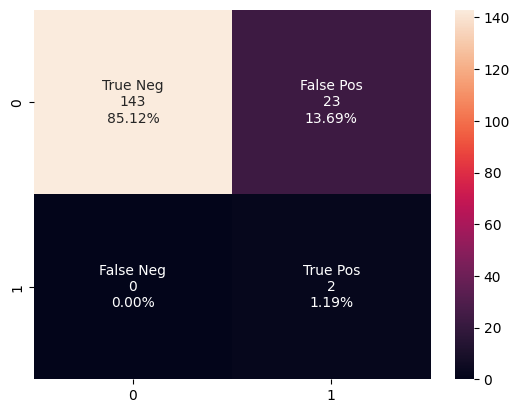

In [ ]:
import seaborn as sns
group_name=("True Neg","False Pos","False Neg","True Pos")
group_counts=["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages=["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels=[f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_name,group_counts,group_percentages)]
labels = pd.DataFrame(labels)  # Assuming 'labels' is a Pandas DataFrame
labels = labels.to_numpy().reshape(2, 2)  # Convert to NumPy array and reshape
sns.heatmap(cm,annot=labels,fmt="")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#KNN algorithm
train_x,test_x,train_y,test_y = train_test_split(df[df.columns[:len(df.columns)-1]].to_numpy(),df[df.columns[-1]].to_numpy(),test_size = 0.45,shuffle=True)

In [ ]:
k = 5  # Choose the number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

In [ ]:
knn.fit(train_x, train_y)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(test_x)

In [ ]:
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8452380952380952


In [ ]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[140   0]
 [ 26   2]]


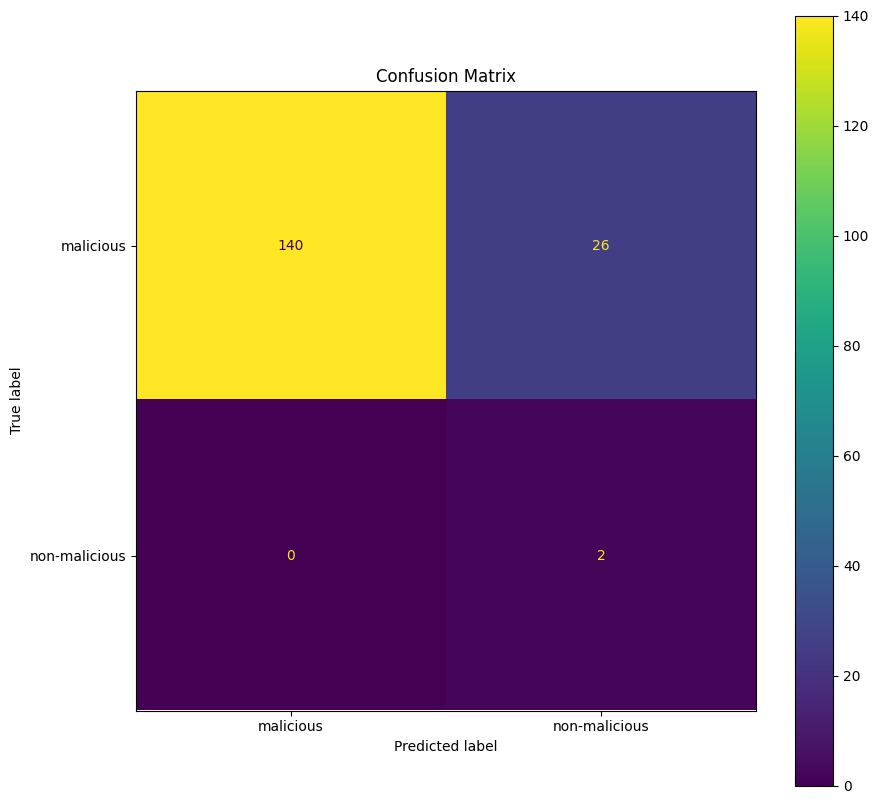

In [ ]:
cm = confusion_matrix(y_pred,test_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

<Axes: >

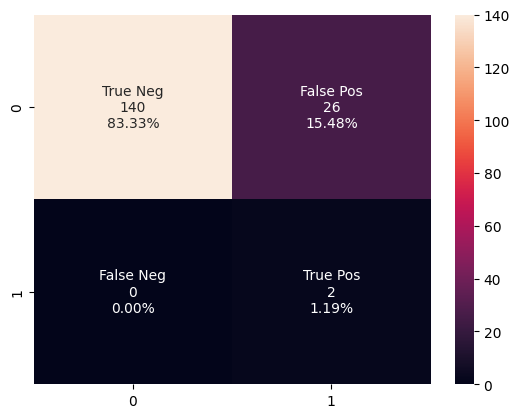

In [ ]:
import seaborn as sns
group_name=("True Neg","False Pos","False Neg","True Pos")
group_counts=["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages=["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels=[f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_name,group_counts,group_percentages)]
labels = pd.DataFrame(labels)  # Assuming 'labels' is a Pandas DataFrame
labels = labels.to_numpy().reshape(2, 2)  # Convert to NumPy array and reshape
sns.heatmap(cm,annot=labels,fmt="")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [ ]:
# Assuming you have a dataset stored in a DataFrame called 'df'
# Separate the features (X) and the target variable (y)
X = df.drop('Label', axis=1)  # Replace 'target_variable' with your actual target column name
y = df['Label']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)


In [ ]:
# Create an instance of the SVM classifier
svm = SVC(kernel='linear')

# Train the model on the training data
svm.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
# Use the trained model to make predictions on the test data
y_pred = svm.predict(X_test)


In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9880952380952381


In [ ]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[132   1]
 [  1  34]]


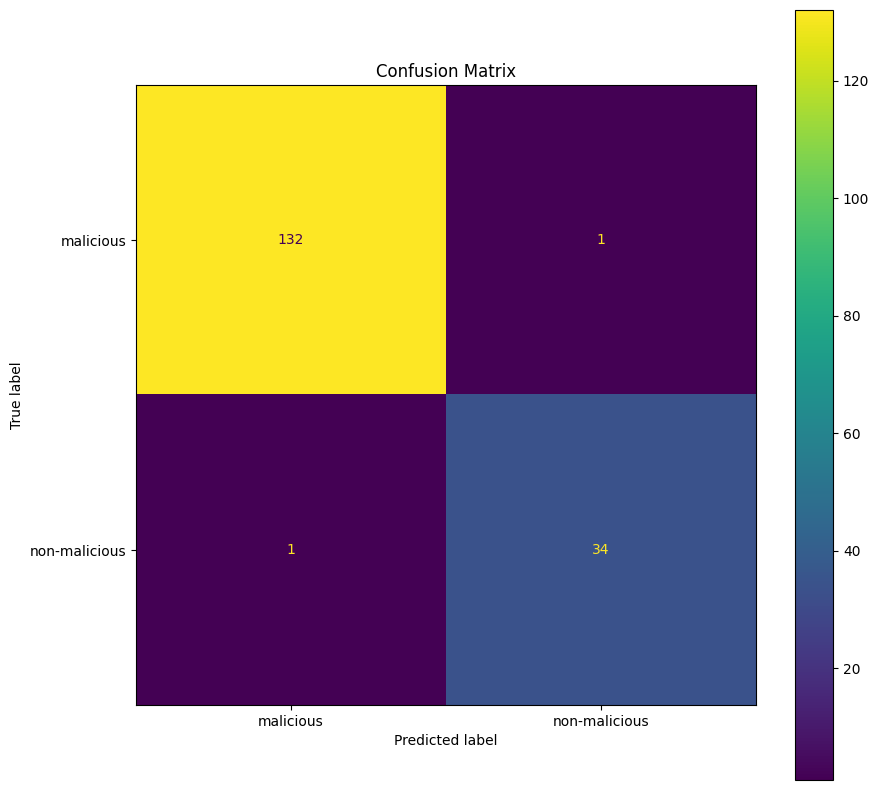

In [ ]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

<Axes: >

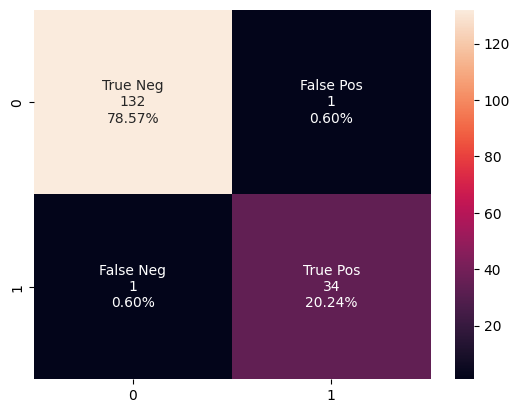

In [ ]:
import seaborn as sns
group_name=("True Neg","False Pos","False Neg","True Pos")
group_counts=["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages=["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels=[f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_name,group_counts,group_percentages)]
labels = pd.DataFrame(labels)  # Assuming 'labels' is a Pandas DataFrame
labels = labels.to_numpy().reshape(2, 2)  # Convert to NumPy array and reshape
sns.heatmap(cm,annot=labels,fmt="")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Assuming you have a dataset stored in a DataFrame called 'df'
# Separate the features (X) and the target variable (y)
X = df.drop('Label', axis=1)  # Replace 'target_variable' with your actual target column name
y = df['Label']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)


In [ ]:
# Create an instance of the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Use the trained model to make predictions on the test data
y_pred = dt.predict(X_test)


In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9702380952380952


In [ ]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[129   4]
 [  1  34]]


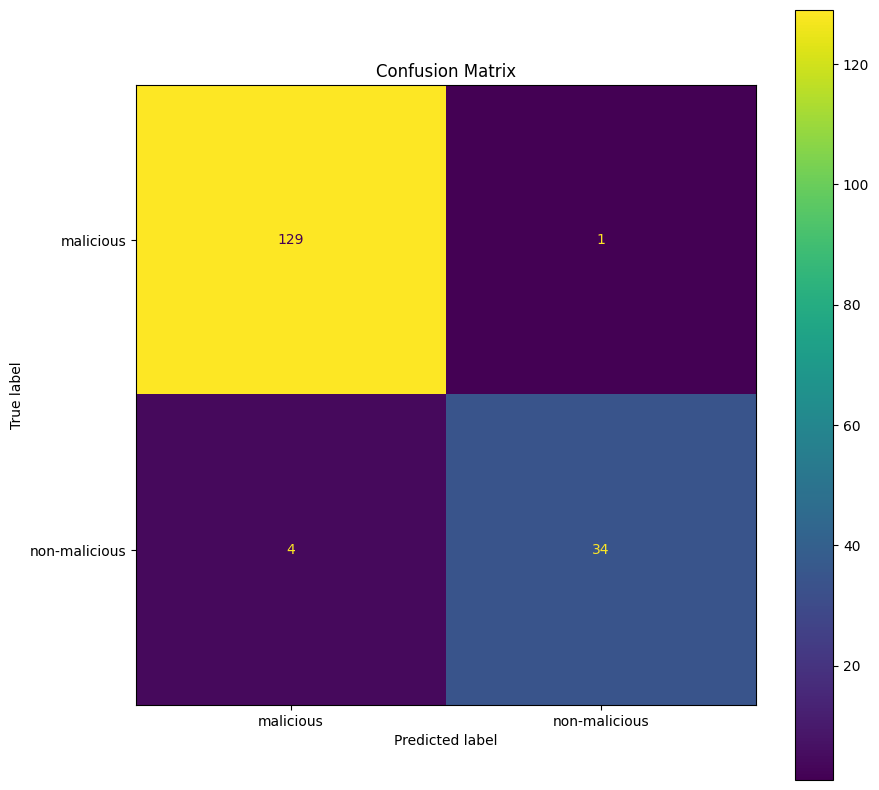

In [ ]:
cm = confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

<Axes: >

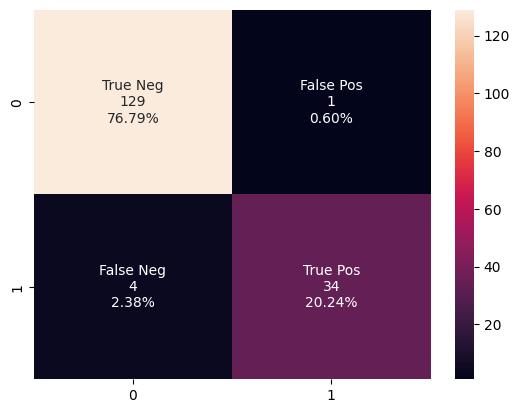

In [ ]:
import seaborn as sns
group_name=("True Neg","False Pos","False Neg","True Pos")
group_counts=["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages=["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels=[f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_name,group_counts,group_percentages)]
labels = pd.DataFrame(labels)  # Assuming 'labels' is a Pandas DataFrame
labels = labels.to_numpy().reshape(2, 2)  # Convert to NumPy array and reshape
sns.heatmap(cm,annot=labels,fmt="")